In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
import chardet
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [8]:
# Read in cleaned CSV
merged_data = pd.read_csv('Cleaned_Dataframes/Merged_Dataframes_cleaned.csv')
merged_data.head()

,State,Percentage of Uninsured Adults,Percentage of Adults visit Reg Doctors,Avoidable Deaths per 100k Population,Treatable Deaths per 100k Population,Preventable Deaths per 100k Population
0,Alabama,15.25,77.65,321.2,108.5,212.6
1,Alaska,15.60,65.55,261.7,67.9,193.9
2,Arizona,15.00,72.20,249.3,76.1,173.2
3,Arkansas,12.70,80.00,351.0,121.7,229.3
4,California,10.55,74.65,203.8,70.8,133.1


In [28]:
# Describe data per column
stat_summ_unis = merged_data["Percentage of Uninsured Adults"].describe()
stat_summ_doc = merged_data["Percentage of Adults visit Reg Doctors"].describe()
stat_summ_avoi = merged_data["Avoidable Deaths per 100k Population"].describe()
stat_summ_treat = merged_data["Treatable Deaths per 100k Population"].describe()
stat_summ_prev = merged_data["Preventable Deaths per 100k Population"].describe()

print('Summary Statistics')
print(stat_summ_unis)
print(stat_summ_doc)
print(stat_summ_avoi)
print(stat_summ_treat)
print(stat_summ_prev)

Summary Statistics
count    51.000000
mean     11.609804
std       4.407358
min       4.100000
25%       8.300000
50%      11.300000
75%      14.900000
max      24.200000
Name: Percentage of Uninsured Adults, dtype: float64
count    51.000000
mean     77.522549
std       5.502566
min      65.550000
25%      73.650000
50%      77.500000
75%      81.725000
max      87.250000
Name: Percentage of Adults visit Reg Doctors, dtype: float64
count     51.000000
mean     260.709804
std       51.413665
min      185.900000
25%      222.050000
50%      252.200000
75%      295.600000
max      385.600000
Name: Avoidable Deaths per 100k Population, dtype: float64
count     51.000000
mean      84.354902
std       18.685335
min       59.500000
25%       70.050000
50%       80.800000
75%       95.200000
max      137.500000
Name: Treatable Deaths per 100k Population, dtype: float64
count     51.000000
mean     176.349020
std       34.608296
min      126.400000
25%      151.900000
50%      173.200000
75%  

In [24]:
# Data variance
var_unis = merged_data["Percentage of Uninsured Adults"].var()
var_doc = merged_data["Percentage of Adults visit Reg Doctors"].var()
var_avoi = merged_data["Avoidable Deaths per 100k Population"].var()
var_treat = merged_data["Treatable Deaths per 100k Population"].var()
var_prev = merged_data["Preventable Deaths per 100k Population"].var()

print('Variance:')
print(f'% Uninsured Adults: {var_unis}')
print(f'% Adults with Primary Care Doc: {var_doc}')
print(f'Avoidable Deaths: {var_avoi}')
print(f'Treatable Deaths: {var_treat}')
print(f'Preventable Deaths: {var_prev}')

Variance:
% Uninsured Adults: 19.424801960784308
% Adults with Primary Care Doc: 30.27823137254904
Avoidable Deaths: 2643.3649019607838
Treatable Deaths: 349.1417254901961
Preventable Deaths: 1197.7341490196081


In [26]:
# Standard Deviation
std_unis = merged_data["Percentage of Uninsured Adults"].std()
std_doc = merged_data["Percentage of Adults visit Reg Doctors"].std()
std_avoi = merged_data["Avoidable Deaths per 100k Population"].std()
std_treat = merged_data["Treatable Deaths per 100k Population"].std()
std_prev = merged_data["Preventable Deaths per 100k Population"].std()

print('Standard Deviation:')
print(f'% Uninsured Adults: {std_unis}')
print(f'% Adults with Primary Care Doc: {std_doc}')
print(f'Avoidable Deaths: {std_avoi}')
print(f'Treatable Deaths: {std_treat}')
print(f'Preventable Deaths: {std_prev}')

Standard Deviation:
% Uninsured Adults: 4.407357707378005
% Adults with Primary Care Doc: 5.502565889887102
Avoidable Deaths: 51.413664545145814
Treatable Deaths: 18.685334503031946
Preventable Deaths: 34.60829595659989


In [61]:
# Sort the data set high to low
unis_sorted = merged_data.sort_values("Percentage of Uninsured Adults")
doc_sorted = merged_data.sort_values("Percentage of Adults visit Reg Doctors")
avoi_sorted = merged_data.sort_values("Avoidable Deaths per 100k Population")
treat_sorted = merged_data.sort_values("Treatable Deaths per 100k Population")
prev_sorted = merged_data.sort_values("Preventable Deaths per 100k Population")

In [ ]:
# DESIRED OUTCOMES
# Both uninsured and doc visits use a 'reverse head' for Top 5 to list in proper order

# uninsured reverse head
unis_head = unis_sorted["State"].head()
rev_unis_head = unis_head.iloc[::-1]
# doctor visits reverse head
doc_head = doc_sorted["State"].head()
rev_doc_head = doc_head.iloc[::-1]


print('Top 5 States - Uninsured')
print(unis_sorted["State"].tail())
print('--------------------------------------------------------------')
print('Lowest 5 States - Regular Primary Care Visits')
print(doc_sorted["State"].tail())
print('--------------------------------------------------------------')
print('Lowest 5 States - Avoidable Deaths')
print(avoi_sorted["State"].tail())
print('--------------------------------------------------------------')
print('Lowest 5 States - Treatable Deaths')
print(treat_sorted["State"].tail())
print('--------------------------------------------------------------')
print('Lowest 5 States - Preventable Deaths')
print(prev_sorted["State"].tail())
print('--------------------------------------------------------------')

In [63]:
# UNDESIRED OUTCOMES
# Both uninsured and doc visits use a 'reverse tail' for Bottom 5 to list in proper order

# Cite: 'ChatGPT' for reverse tail code
# uninsured reverse tail
unis_tail = unis_sorted["State"].tail()
rev_unis_tail = unis_tail.iloc[::-1]
# doctor visits reverse tail
doc_tail = doc_sorted["State"].tail()
rev_doc_tail = doc_tail.iloc[::-1]

# Print Top 5 States
print('Bottom 5 States - Least Uninsured')
print(rev_unis_tail)
print('--------------------------------------------------------------')
print('Bottom 5 States - Least Regular Primary Care Visits')
print(rev_doc_tail)
print('--------------------------------------------------------------')
print('Bottom 5 States - Most Avoidable Deaths')
print(avoi_sorted["State"].head())
print('--------------------------------------------------------------')
print('Bottom 5 States - Most Treatable Deaths')
print(treat_sorted["State"].head())
print('--------------------------------------------------------------')
print('Bottom 5 States - Most Preventable Deaths')
print(prev_sorted["State"].head())
print('--------------------------------------------------------------')

Bottom 5 States - Least Uninsured
43          Texas
36       Oklahoma
9         Florida
24    Mississippi
10        Georgia
Name: State, dtype: object
--------------------------------------------------------------
Bottom 5 States - Least Regular Primary Care Visits
29    New Hampshire
21    Massachusetts
45          Vermont
39     Rhode Island
19            Maine
Name: State, dtype: object
--------------------------------------------------------------
Bottom 5 States - Most Avoidable Deaths
23        Minnesota
44             Utah
21    Massachusetts
6       Connecticut
4        California
Name: State, dtype: object
--------------------------------------------------------------
Bottom 5 States - Most Treatable Deaths
23        Minnesota
21    Massachusetts
5          Colorado
6       Connecticut
45          Vermont
Name: State, dtype: object
--------------------------------------------------------------
Bottom 5 States - Most Preventable Deaths
23     Minnesota
32      New York
44      

In [58]:
# Bottom 5 States


Lowest 5 States - Uninsured
10        Georgia
24    Mississippi
9         Florida
36       Oklahoma
43          Texas
Name: State, dtype: object
--------------------------------------------------------------
Lowest 5 States - Regular Primary Care Visits
19            Maine
39     Rhode Island
45          Vermont
21    Massachusetts
29    New Hampshire
Name: State, dtype: object
--------------------------------------------------------------
Lowest 5 States - Avoidable Deaths
17         Kentucky
3          Arkansas
36         Oklahoma
24      Mississippi
48    West Virginia
Name: State, dtype: object
--------------------------------------------------------------
Lowest 5 States - Treatable Deaths
18        Louisiana
48    West Virginia
36         Oklahoma
3          Arkansas
24      Mississippi
Name: State, dtype: object
--------------------------------------------------------------
Lowest 5 States - Preventable Deaths
42        Tennessee
17         Kentucky
24      Mississippi
36       

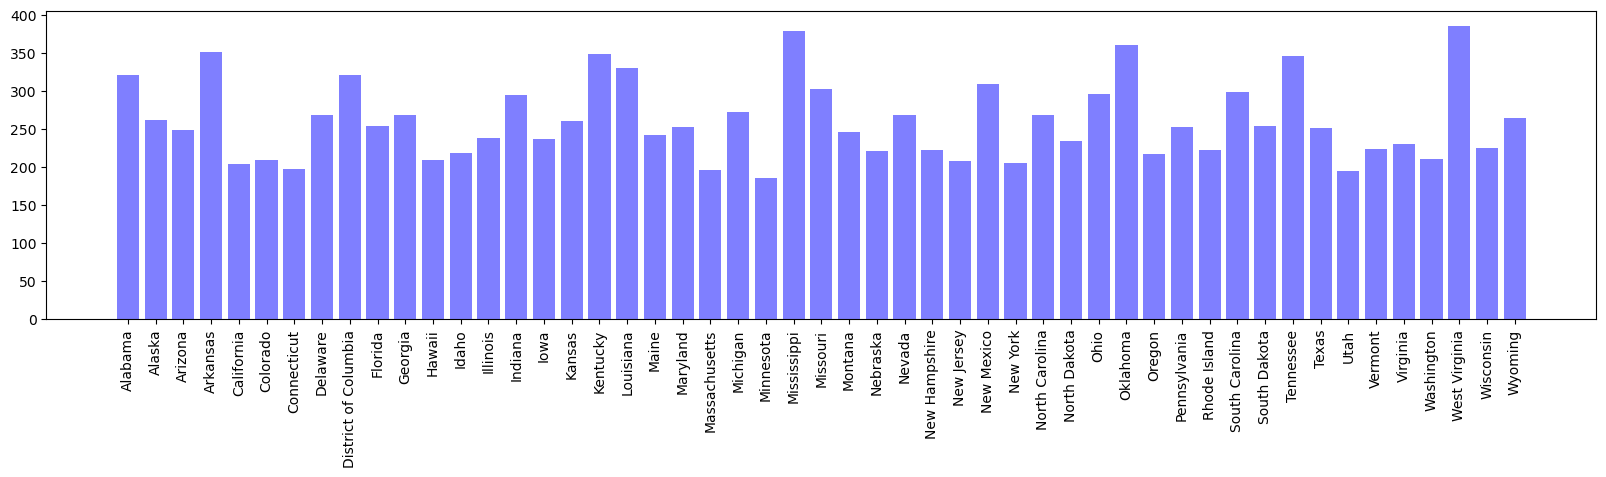

In [30]:
# Bar chart - states in alphabetical order
x_axis = np.arange(len(merged_data["Avoidable Deaths per 100k Population"]))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, merged_data["Avoidable Deaths per 100k Population"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, merged_data["State"], rotation="vertical")
plt.show()

In [ ]:
# COPY - NEEDS EDITED
# This one is NOT correct yet - playing with the idea of standard deviation bars - currently it's not doing standard deviation from the average
# std_dev = avoi_deaths_df['Deaths per 100k Population'].std()

# x_axis = np.arange(len(avoi_deaths_df))
# tick_locations = [State for State in x_axis]
# plt.figure(figsize=(20,4))
# plt.bar(x_axis, avoi_deaths_df["Deaths per 100k Population"], color='b', alpha=0.5, align="center")
# plt.xticks(tick_locations, avoi_deaths_df["State"], rotation="vertical")
# plt.errorbar(avoi_deaths_df['State'], avoi_deaths_df['Deaths per 100k Population'], yerr=std_dev, fmt='o', color='r', ecolor='black', capsize=5)
# plt.show()

In [ ]:
# COPY
x_axis = np.arange(len(unis_clean_1819_sorted))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, unis_clean_1819_sorted["Percentage of Uninsured Adults"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, unis_clean_1819_sorted["State"], rotation="vertical")
plt.title('Average Percentage of Uninsured Individuals per State (2018-2019)')
plt.xlabel('State')
plt.ylabel('Percentage of Uninsured Individuals')
plt.show()

In [ ]:
# COPY 
# Sort the data set high to low - top 5 results
avoi_deaths_df_sorted = avoi_deaths_df.sort_values("Deaths per 100k Population")
avoi_deaths_df_sorted.head()

In [ ]:
# COPY
# Bottom 5 results
avoi_deaths_df_sorted.tail()

In [ ]:
# COPY
x_axis = np.arange(len(avoi_deaths_df_sorted))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, avoi_deaths_df_sorted["Deaths per 100k Population"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, avoi_deaths_df_sorted["State"], rotation="vertical")
plt.title('Avoidable Deaths per 100,000 Population per State (2018-2019)')
plt.xlabel('State')
plt.ylabel('Deaths per 100k Population')
plt.show()

In [ ]:
# COPY
# Sort the data set high to low 
treat_deaths_df_sorted = treat_deaths_df.sort_values("Deaths per 100k Population")
treat_deaths_df_sorted.head()

In [ ]:
# COPY
# Bottom 5 results
treat_deaths_df_sorted.tail()

In [ ]:
# COPY
x_axis = np.arange(len(treat_deaths_df_sorted))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, treat_deaths_df_sorted["Deaths per 100k Population"], color='g', alpha=0.5, align="center")
plt.xticks(tick_locations, treat_deaths_df_sorted["State"], rotation="vertical")
plt.title('Treatable Deaths per 100,000 Population per State (2018-2019)')
plt.xlabel('State')
plt.ylabel('Deaths per 100k Population')
plt.show()

In [ ]:
# COPY
# Sort the data set high to low - top 5 results
prev_deaths_df_sorted = prev_deaths_df.sort_values("Deaths per 100k Population")
prev_deaths_df_sorted.head()

In [ ]:
# COPY
# Bottom 5 results
prev_deaths_df_sorted.tail()

In [ ]:
# COPY
x_axis = np.arange(len(prev_deaths_df_sorted))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, prev_deaths_df_sorted["Deaths per 100k Population"], color='y', alpha=0.5, align="center")
plt.xticks(tick_locations, prev_deaths_df_sorted["State"], rotation="vertical")
plt.title('Preventable Deaths per 100,000 Population per State (2018-2019)')
plt.xlabel('State')
plt.ylabel('Deaths per 100k Population')
plt.show()

In [ ]:
# COPY
# We ATTEMPTED to use the existing dataframes without the US -- but because those dropped based on index
# the indexes didn't align and we got errors -- going to try to redo dfs instead

# unis_clean_1819.reset_index()
# percentage_unis = unis_clean_1819["Percentage of Uninsured Adults"]
# unis_1819_df = pd.DataFrame(percentage_unis)
# unis_1819_df.head()

In [ ]:
# COPY
# avoi_deaths_df.reset_index()
# avoi_factor = avoi_deaths_df["Deaths per 100k Population"]
# avoi_clean_df = pd.DataFrame(avoi_factor)
# avoi_clean_df.head()

In [ ]:
# COPY
# Creating an official DataFrame for the uninsured data to utilize with graphs
unis_1819_steptodf = census_1819_df.groupby("State")["Percentage of Uninsured Adults"].mean().reset_index()
unis_factor = unis_1819_steptodf["Percentage of Uninsured Adults"]
unis_1819_df = pd.DataFrame(unis_factor)

# Display the resulting DataFrame
unis_1819_df.head()

In [ ]:
# COPY
# creating an official dataframe for the avoidable deaths data
avoi_factor = avoi_deaths_narrow["Deaths per 100k Population"]
avoidable_deaths_df = pd.DataFrame(avoi_factor)
avoidable_deaths_df.head()

In [ ]:
# COPY
uninsured = unis_1819_df['Percentage of Uninsured Adults']
deaths = avoidable_deaths_df['Deaths per 100k Population']
# the next line (pd.concat) is from ChatGPT : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
clean_data_df = pd.concat([uninsured, deaths], axis=1).dropna()
clean_data_df.head()

In [ ]:
# COPY
x_uninsured = clean_data_df.iloc[:,0] 
y_deaths = clean_data_df.iloc[:,1] 
correlation = st.pearsonr(x_uninsured,y_deaths) 
plt.scatter(x_uninsured,y_deaths) 
plt.xlabel('Percentage Uninsured') 
plt.ylabel('Avoidable Deaths per 100,000 Population')
plt.title('Scatter Plot Showing Correlation Between Uninsured Individuals and Avoidable Deaths')
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.show()

In [ ]:
# COPY
unis_avoi = pd.merge(unis_clean_1819, avoi_deaths_df, on=["State"])
unis_avoi.head(15)

In [ ]:
# COPY
x_uninsured = unis_avoi.iloc[:,1] 
y_deaths = unis_avoi.iloc[:,3] 
correlation = st.pearsonr(x_uninsured,y_deaths) 
plt.scatter(x_uninsured,y_deaths) 
plt.xlabel('Percentage Uninsured') 
plt.ylabel('Avoidable Deaths per 100,000 Population')
plt.title('Scatter Plot Showing Correlation Between Uninsured Individuals and Avoidable Deaths')
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.show()

In [ ]:
# COPY
unis_treat = pd.merge(unis_clean_1819, treat_deaths_df, on=["State"])
unis_treat.tail(15)

In [ ]:
# COPY
x_uninsured = unis_treat.iloc[:,1] 
y_deaths = unis_treat.iloc[:,3] 
correlation = st.pearsonr(x_uninsured,y_deaths) 
plt.scatter(x_uninsured,y_deaths) 
plt.xlabel('Percentage Uninsured') 
plt.ylabel('Treatable Deaths per 100,000 Population')
plt.title('Scatter Plot Showing Correlation Between Uninsured Individuals and Treatable Deaths')
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.show()

In [ ]:
# COPY
unis_prev = pd.merge(unis_clean_1819, prev_deaths_df, on=["State"])
unis_prev.tail(15)

In [ ]:
# COPY

x_uninsured = unis_prev.iloc[:,1] 
y_deaths = unis_prev.iloc[:,3] 
correlation = st.pearsonr(x_uninsured,y_deaths) 
plt.scatter(x_uninsured,y_deaths) 
plt.xlabel('Percentage Uninsured') 
plt.ylabel('Preventable Deaths per 100,000 Population')
plt.title('Scatter Plot Showing Correlation Between Uninsured Individuals and Preventable Deaths')
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.show()